In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas_profiling
from ast import literal_eval
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

### Applying inferential statistics to evaluate our H0 - Test 1

As we obtained trend information regarding tofu, we can analyze our main question and Hypothesis

Hypothesis: Between the years of 2009 and 2018 the number of mentions of tofu recipes increased significantly

H0: mean 2018 sample = mean population

Question = Is the group significantly different from the regular population ?

In [2]:
trends = pd.read_csv(r'\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\Google Trends API scrapping\Google Trends Good\google_trends_analysis.csv')

#### Population table

In [3]:
tofu_trends_population = trends[['date', 'tofu']].copy()

In [4]:
tofu_trends_population.describe()

,tofu
count,132.000000
mean,29.681818
std,4.687678
min,19.000000
25%,26.000000
50%,29.000000
75%,33.000000
max,44.000000


In [5]:
tofu_trends_population['date'] = pd.to_datetime(tofu_trends_population['date'])

In [6]:
# Add year column
tofu_trends_population['year'] = tofu_trends_population['date'].dt.year

In [7]:
tofu_trends_population

,date,tofu,year
0,2008-01-01,27,2008
1,2008-02-01,25,2008
2,2008-03-01,24,2008
3,2008-04-01,25,2008
4,2008-05-01,23,2008
...,...,...,...
127,2018-08-01,37,2018
128,2018-09-01,35,2018
129,2018-10-01,34,2018
130,2018-11-01,33,2018


#### Sample table 2018

Our first sample is the population of 2018

In [8]:
tofu_trends_sample = tofu_trends_population

In [9]:
from_year, to_year = '2017-12-31','2018-12-31'
tofu_trends_sample['date'] = tofu_trends_sample['date'].apply(lambda x: x.tz_localize(None))
tofu_trends_sample = tofu_trends_sample.loc[tofu_trends_sample['date'].between(from_year, to_year, inclusive=False)]

In [10]:
tofu_trends_sample

,date,tofu,year
120,2018-01-01,44,2018
121,2018-02-01,42,2018
122,2018-03-01,41,2018
123,2018-04-01,38,2018
124,2018-05-01,35,2018
125,2018-06-01,37,2018
126,2018-07-01,39,2018
127,2018-08-01,37,2018
128,2018-09-01,35,2018
129,2018-10-01,34,2018


In [11]:
tofu_trends_sample.describe()

,tofu,year
count,12.000000,12.0
mean,37.333333,2018.0
std,3.601347,0.0
min,33.000000,2018.0
25%,34.750000,2018.0
50%,37.000000,2018.0
75%,39.500000,2018.0
max,44.000000,2018.0


#### Inferential statistics Test-1

1. Set up the hypothesis test:

2. Write down all the steps followed for setting up the test 
3. Calculate the statistic in Python

In [12]:
#1. Fisrt we import the library
import math

# 2. Second, we determine the variables and run python in order to obtain statistic

sample_mean = 37.333333
pop_mean = 29.681818
pop_std = 4.687678
n = 12
statistic = (sample_mean - pop_mean)/(pop_std/math.sqrt(n))
print("Statistic is: ", statistic)


Statistic is:  5.654318720217295


The Z-value is a test statistic for Z-tests that measures the difference between an observed statistic and its hypothesized population parameter in units of the standard deviation. Converting an observation to a Z-value is called standardization.

### Applying inferential statistics to evaluate our H0 - Test 2

In this case, we will pick a random sample for our test, the rest remains the same

#### Getting the random table

In [13]:
tofu_random_sample = tofu_trends_population.sample(n = 12) 

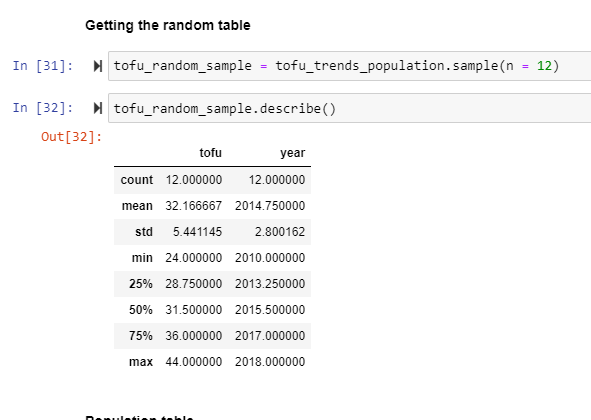

In [14]:
# We display the images that we got, for not losing them when runing again the code
from IPython.display import Image
Image(filename = r"C:\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\Images from Random\Random_sample.png")

#### Population table

In [15]:
tofu_trends_population.describe()

,tofu,year
count,132.000000,132.000000
mean,29.681818,2013.000000
std,4.687678,3.174324
min,19.000000,2008.000000
25%,26.000000,2010.000000
50%,29.000000,2013.000000
75%,33.000000,2016.000000
max,44.000000,2018.000000


In [16]:
tofu_trends_population['date'] = pd.to_datetime(tofu_trends_population['date'])

#### Inferential statistics Test-2

1. Set up the hypothesis test:

2. Write down all the steps followed for setting up the test 
3. Calculate the statistic in Python

In [17]:
#1. Fisrt we import the library
import math

# 2. Second, we determine the variables and run python in order to obtain statistic

sample_mean = 32.17
pop_mean = 29.681818
pop_std = 4.687678
n = 12
statistic = (sample_mean - pop_mean)/(pop_std/math.sqrt(n))
print("Statistic is: ", statistic)


Statistic is:  1.8387174385605611


The Z-value is a test statistic for Z-tests that measures the difference between an observed statistic and its hypothesized population parameter in units of the standard deviation. Converting an observation to a Z-value is called standardization.

### Applying inferential statistics to evaluate our H0 - Test 3

First, we pick a random entry per year

In [18]:
size = 1       # sample size
replace = True  # with replacement - Same item do not appear
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
tofu_sample_year = tofu_trends_population.groupby('year', as_index=False).apply(fn)


In [19]:
tofu_trends_population

,date,tofu,year
0,2008-01-01,27,2008
1,2008-02-01,25,2008
2,2008-03-01,24,2008
3,2008-04-01,25,2008
4,2008-05-01,23,2008
...,...,...,...
127,2018-08-01,37,2018
128,2018-09-01,35,2018
129,2018-10-01,34,2018
130,2018-11-01,33,2018


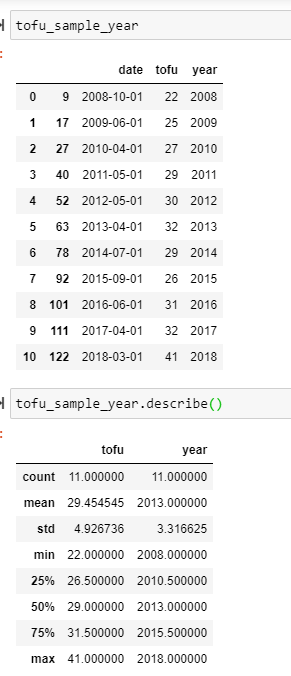

In [20]:
# We display the images that we got, for not losing them when runing again the code
from IPython.display import Image
Image(filename = r"C:\Users\marcp\Desktop\Ironhack\Clases\FINAL PROJECT\Project 2\Images from Random\Random_sample_per_year.png")

In [21]:
tofu_trends_population.describe()

,tofu,year
count,132.000000,132.000000
mean,29.681818,2013.000000
std,4.687678,3.174324
min,19.000000,2008.000000
25%,26.000000,2010.000000
50%,29.000000,2013.000000
75%,33.000000,2016.000000
max,44.000000,2018.000000


1. Set up the hypothesis test:

2. Write down all the steps followed for setting up the test 
3. Calculate the statistic in Python

In [22]:
#1. Fisrt we import the library
import math

# 2. Second, we determine the variables and run python in order to obtain statistic

sample_mean = 29.454545
pop_mean = 29.681818
pop_std = 4.687678
n = 12
statistic = (sample_mean - pop_mean)/(pop_std/math.sqrt(n))
print("Statistic is: ", statistic)


Statistic is:  -0.16795026586237446


The Z-value is a test statistic for Z-tests that measures the difference between an observed statistic and its hypothesized population parameter in units of the standard deviation. Converting an observation to a Z-value is called standardization.

#### Inferential statistics Test-3

### Visualize our data

In [23]:
tofu_trends_population

,date,tofu,year
0,2008-01-01,27,2008
1,2008-02-01,25,2008
2,2008-03-01,24,2008
3,2008-04-01,25,2008
4,2008-05-01,23,2008
...,...,...,...
127,2018-08-01,37,2018
128,2018-09-01,35,2018
129,2018-10-01,34,2018
130,2018-11-01,33,2018


Text(0.5, 1.0, 'Tofu Trends Population distributed')

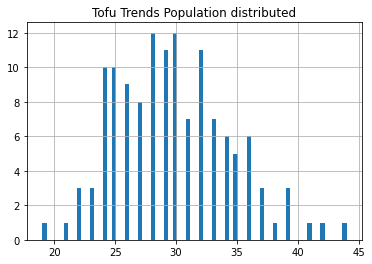

In [24]:
tofu_trends_population['tofu'].hist(bins=70)
plt.title("Tofu Trends Population distributed")
# Normalized distributed

### Applying inferential statistics to evaluate our H0 - Test 4 (mean 2017)

As we obtained trend information regarding tofu, we can analyze our main question and Hypothesis

Hypothesis: Between the years of 2009 and 2018 the number of mentions of tofu recipes increased significantly

H0: mean 2017 sample = mean population

Question = Is the group significantly different from the regular population ?

#### Population table

In [31]:
tofu_trends_population.describe()

,tofu
count,132.000000
mean,29.681818
std,4.687678
min,19.000000
25%,26.000000
50%,29.000000
75%,33.000000
max,44.000000


In [34]:
tofu_trends_population['date'] = pd.to_datetime(tofu_trends_population['date'])

In [35]:
# Add year column
tofu_trends_population['year'] = tofu_trends_population['date'].dt.year

In [36]:
tofu_trends_population

,date,tofu,year
0,2008-01-01,27,2008
1,2008-02-01,25,2008
2,2008-03-01,24,2008
3,2008-04-01,25,2008
4,2008-05-01,23,2008
...,...,...,...
127,2018-08-01,37,2018
128,2018-09-01,35,2018
129,2018-10-01,34,2018
130,2018-11-01,33,2018


#### Sample table 2017

In [8]:
tofu_trends_sample = tofu_trends_population

In [39]:
from_year, to_year = '2016-12-31','2017-12-31'
tofu_trends_sample['date'] = tofu_trends_sample['date'].apply(lambda x: x.tz_localize(None))
tofu_trends_sample = tofu_trends_sample.loc[tofu_trends_sample['date'].between(from_year, to_year, inclusive=False)]

In [40]:
tofu_trends_sample

,date,tofu,year
108,2017-01-01,36,2017
109,2017-02-01,34,2017
110,2017-03-01,34,2017
111,2017-04-01,32,2017
112,2017-05-01,31,2017
113,2017-06-01,32,2017
114,2017-07-01,39,2017
115,2017-08-01,39,2017
116,2017-09-01,36,2017
117,2017-10-01,34,2017


Our first sample is the population of 2017

In [41]:
tofu_trends_sample.describe()

,tofu,year
count,12.000000,12.0
mean,34.333333,2017.0
std,2.674232,0.0
min,31.000000,2017.0
25%,32.000000,2017.0
50%,34.000000,2017.0
75%,36.000000,2017.0
max,39.000000,2017.0


#### Inferential statistics Test-1

1. Set up the hypothesis test:

2. Write down all the steps followed for setting up the test 
3. Calculate the statistic in Python

In [42]:
#1. Fisrt we import the library
import math

# 2. Second, we determine the variables and run python in order to obtain statistic

sample_mean = 34.33
pop_mean = 29.681818
pop_std = 4.687678
n = 12
statistic = (sample_mean - pop_mean)/(pop_std/math.sqrt(n))
print("Statistic is: ", statistic)


Statistic is:  3.43491484987967


The Z-value is a test statistic for Z-tests that measures the difference between an observed statistic and its hypothesized population parameter in units of the standard deviation. Converting an observation to a Z-value is called standardization.